<a href="https://colab.research.google.com/github/eshadutta9/behavior-change-support-systems-simulation/blob/main/BCSS_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time
import csv
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt

In [ ]:
## add prompts and create function below
# prompts = {'type_1': {'travel': ["Opt for public transportation to save on fuel and parking costs", "Share rides with colleagues or friends to split expenses", "Buy monthly transit passes or carpooling packages for potential discounts", "Adjust your travel times to avoid peak traffic and save on fuel and time"],
#                       'household': ["Use energy-saving appliances and turn off lights when not needed", "Purchase non-perishable items in bulk to save on unit costs", "Create a monthly budget to track and control household spending", "Learn basic home maintenance skills to avoid costly professional services"],
#                       'uber eats': ["Opt for combo or meal deals for better value", "Choose local restaurants to potentially save on delivery fees", "Skip unnecessary add-ons and extras to keep costs down", " Take advantage of free delivery promotions or days"],
#                       'recreation': ["Look for discounts on tickets for movies, shows, or attractions", "Join membership programs for discounts on recreational activities", "Create your own movie nights or game nights at home", "Explore local parks and nature areas for low-cost recreational options"]
#                       }
#           }

tips = {'consensus': {'travel': ["Explore group travel options to benefit from collective discounts", "Tap into travel forums or social media groups to gather insights from experienced travelers"],
                      'household': ["Join bulk-buying clubs to take advantage of collective discounts on household items", "Initiate or join neighborhood swap groups where members exchange items they no longer need"],
                      'uber eats': ["Consider user reviews and ratings to identify cost-effective options on Uber Eats", "Leverage social media platforms to gather consensus on budget-friendly restaurants"],
                      'recreation': ["Participate in local community events for recreation", "Explore online forums dedicated to budget-friendly recreation"]
                      },
        'authority': {'travel': ["Utilize authoritative budgeting apps tailored for travel expenses", "Consider consulting a financial advisor for personalized travel budget advice"],
                      'household': [" Seek advice from a financial planner to optimize your household budget", "Consult with an energy-efficiency expert to identify ways to reduce utility costs"],
                      'uber eats': ["Opt for restaurants with nutritionist-approved menus on food delivery apps", "Utilize authoritative budgeting apps specific to dining out"],
                      'recreation': ["Use authoritative apps designed for budgeting recreational expenses", "Consult with a recreation planner for authoritative advice on planning cost-effective leisure activities"]
                      },
        'commitment': {'travel': ["Commit to setting aside a specific amount each month for travel savings", "Create a physical or digital \"travel fund\" jar and commit to putting loose change or extra funds into it"],
                      'household': ["Commit to planning meals weekly to avoid unnecessary grocery expenses", "Regularly review household subscriptions and commit to canceling unnecessary ones"],
                      'uber eats': ["Commit to designated days for Uber Eats orders", "Make a commitment to cook at home for a certain number of days each week"],
                      'recreation': ["Commit to saving a portion of your budget specifically for recreational activities", "Create a weekly activity calendar and commit to sticking to planned, budget-friendly recreational activities"]
                      }

        }




### simulate time passing 1 sec = 1 month or sth like that
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun']
month = months[0]
year = '2024'

In [ ]:
class Prompt:
  def __init__(self):
    self.count_prompt = {"type_1": 5,
                         "type_2": 5,
                         "type_3": 5
                         }
    self.final_count_prompt = {"type_1": 0,
                              "type_2": 0,
                              "type_3": 0,
                              }

    self.ratio = [1,1,1]
    self.total = 15

  def update_ratio(self, new_count_prompt):
    self.count_prompt = new_count_prompt
    x = self.total/(self.count_prompt["type_1"]+self.count_prompt["type_2"]+self.count_prompt["type_3"])
    # print("x : ", x)
    self.count_prompt["type_1"] = round(x * self.count_prompt["type_1"])
    self.count_prompt["type_2"] = round(x * self.count_prompt["type_2"])
    self.count_prompt["type_3"] = round(x * self.count_prompt["type_3"])
    self.ratio = [self.count_prompt["type_1"], self.count_prompt["type_2"], self.count_prompt["type_3"]]
    # print("ratio : ", self.ratio)

In [ ]:
def return_user_click():
  return random.choice([1, 0])

In [ ]:
class User:
  def __init__(self, user_id, name, age, income, real_life_goals = []):
    self.user_id = user_id
    self.name = name
    self.age = age
    self.income = income
    self.selected_categories = []
    self.budget = {} #this is a dictionary
    self.current_expenditure = {}
    self.prompt_count = {}
    self.real_life_goals = real_life_goals

  def set_budget(self, category, budget):
    self.budget[category] = budget
    if category not in self.selected_categories:
      self.selected_categories.append(category)
    # if category not in self.current_expenditure:
      # self.current_expenditure[category] = 0

  def update_expenditure(self, month, year, category, amount):
    if f'{month}-{year}-{category}' not in self.current_expenditure:
      self.current_expenditure[f'{month}-{year}-{category}'] = amount
    else:
      self.current_expenditure[f'{month}-{year}-{category}'] += amount

In [ ]:
class FinancialSavingsApp:

    def __init__(self):
      self.current_users = []

    def simulate_goal_setting(self, user):
      print("Press e to exit.")
      while(True):
        goal = input("Enter a life goal you want to save for: ")
        if(goal=='e'):
          break
        user.real_life_goals.append(goal)

    def simulate_category_selection(self, user, categories = {}):
      if(len(categories)>0):
        for cat in categories:
          user.selected_categories.append(cat)
          user.budget[cat] = categories[cat]
          # for month in months:
          #   user.current_expenditure.append({'month':month, 'year':'2024', 'category':cat, 'amount':0})

        return

      print("Press e to exit.")
      while(True):
        category = input("Enter category name:")
        if(category=='e'):
          break
        budget = int(input("Enter budget:"))
        if(budget=='e'):
          break
        user.selected_categories.append(category)
        user.budget[category] = budget
        # user.current_expenditure[category] = 0


    def simulate_tip_prompts(self, user, type):
        type_of_prompts = ""
        if(type == 1):
          type_of_prompts = "consensus"
        if(type == 2):
          type_of_prompts = "authority"
        if(type == 3):
          type_of_prompts = "commitment"
        category = random.choice(user.selected_categories)
        idx = random.choice([0, 1])
        tip = tips[type_of_prompts][category][idx]
        print(tip)

    def all_prompt_simulation(self, p, user, category = "travel"):
        new_prompt_count = {"type_1":0, "type_2":0, "type_3":0}

        for i in range(p.count_prompt["type_1"]):
          print("simulating type 1 prompt")
          app.simulate_tip_prompts(user, 1)
          new_prompt_count["type_1"] += return_user_click()
          p.final_count_prompt["type_1"] += 1

        for i in range(p.count_prompt["type_2"]):
          print("simulating type 2 prompt")
          app.simulate_tip_prompts(user, 2)
          new_prompt_count["type_2"] += return_user_click()
          p.final_count_prompt["type_2"] += 1

        for i in range(p.count_prompt["type_3"]):
          print("simulating type 3 prompt")
          app.simulate_tip_prompts(user, 3)
          new_prompt_count["type_3"] += return_user_click()
          p.final_count_prompt["type_3"] += 1

        p.update_ratio(new_prompt_count)


    # def simulate_type_1_prompts(self, user, category):
    #     if("type_1" not in user.prompt_count):
    #       user.prompt_count["type_1"] = 1
    #     else:
    #       user.prompt_count["type_1"] += 1
    #     idx = random.randint(0, len(prompts["type_1"][category])-1)
    #     tip = prompts["type_1"][idx]
    #     print(f"\nHere's a tip for you since you are monitoring your expenditure in {category}: ")

    def simulate_type_2_prompts(self, user, month, year, spending_amount, category):
      if("type_2" not in user.prompt_count):
        user.prompt_count["type_2"] = 1
      else:
        user.prompt_count["type_2"] += 1
      # Print simulation results
      print(f"\n{user.name}'s Budget in {category}: ${user.budget[category]:.2f}")
      print(f"\n{user.name}'s Current Expenditure in {category}: ${user.current_expenditure[f'{month}-{year}-{category}']:.2f}")

    #   # Provide positive/negative prompts based on expenditure
    #   self.simulate_type_4_5_prompts(user, month, year, spending_amount, category)

    # def simulate_type_3_prompts(self, user):
    #     if("type_3" not in user.prompt_count):
    #       user.prompt_count["type_3"] = 1
    #     else:
    #       user.prompt_count["type_3"] += 1
    #     print("Open the app and view your progress!")


    def simulate_type_4_5_prompts(self, user, month, year, spending_amount, category):
        if("type_4_5" not in user.prompt_count):
          user.prompt_count["type_4_5"] = 1
        else:
          user.prompt_count["type_4_5"] += 1
        # Display positive/negative prompts based on expenditure
        if user.current_expenditure[f'{month}-{year}-{category}'] <= user.budget[category] * 0.9:
            print(f"\nGreat job! You have spent only {100*user.current_expenditure[f'{month}-{year}-{category}']/user.budget[category]:.2f}% of your budget in {category} category during {month} {year}. You're well within your budget.")
        elif user.budget[category] * 0.9 < user.current_expenditure[f'{month}-{year}-{category}'] < user.budget[category] :
            print(f"\nYou have spent only {100*user.current_expenditure[f'{month}-{year}-{category}']/user.budget[category]:.2f}% of your budget in {category} category during {month} {year}. You're getting close to your budget limit. Be mindful of your spending.")
        else:
            print(f"\nWarning! You've exceeded your budget by {100*user.current_expenditure[f'{month}-{year}-{category}']/user.budget[category]:.2f}% in {category} category during {month} {year}. Consider adjusting your spending habits.")

    def simulate_autologging(self, user, month, year, expenditure = {}):

        if(len(expenditure) > 0):
          user.update_expenditure(month, year, expenditure['category'], expenditure['expense'])
          self.simulate_type_2_prompts(user, month, year, expenditure['expense'], expenditure['category'])
          return
        for category in user.selected_categories:
          spending_amount = random.uniform(0, user.budget[category]) # create data and add to csv
          user.update_expenditure(month, year, category, spending_amount)
          self.simulate_type_2_prompts(user, month, year, spending_amount, category)

    def generate_monthly_report(self, user, month):
        # Evaluate the user's monthly report and provide feedback and tips
        final_report = []
        print(f"\nHERE'S YOUR MONTHLY REPORT FOR THE MONTH {month}")
        for category in user.selected_categories:
          report = {
              'category': category,
              'budget': user.budget[category],
              'current_expenditure': user.current_expenditure[f'{month}-{year}-{category}'],
              'percentage': 100*user.current_expenditure[f'{month}-{year}-{category}']/user.budget[category]
          }

          final_report.append(report)

          # Evaluate the report and provide feedback

          if report['current_expenditure'] <= report['budget']:
              print(f"You managed to stay within your budget in category {category} by spending only {report['percentage']:.2f}% of your budget. Well done!")
              print(f"Continue managing your expenses to reach your goals of {user.real_life_goals}.")
          else:
              print(f"You fell short of your savings goal in category {category} and spent {report['percentage']:.2f}% of your budget. Review your spending habits.")
              print(f"Consider adjusting your budget and savings goal for the next month  to reach your goals of {user.real_life_goals}.")

    def reassess_goals(self, user):
        # Allow the user to reassess goals and limits based on the monthly report
        print("\nReassessing Goals and Limits:")
        print("1. Adjust Budget")
        print("2. Add Category")
        print("3. No Further Changes")
        while True:
          choice = input("Choose an option (1/2/3): ")
          if choice == '1':
              new_category = input("Which category would you like to adjust the goal for? ")
              new_budget = float(input("Enter the new budget: "))
              user.set_budget(new_category, new_budget)
              print("Budget updated!")
          elif choice == '2':
              new_category = input("Enter the new category: ")
              new_budget = float(input("Enter a budget for this category: "))
              user.set_budget(new_category, new_budget)
              print("Category added!")
          elif choice == '3':
              break
          else:
              print("Invalid choice. No changes made.")

    def save_data_eom(self, user, month, year):
      df = pd.DataFrame(columns = ['userid', 'month', 'year', 'category', 'budget', 'expenditure'])
      for category in user.selected_categories:
        data = {'userid': [user.user_id], 'month': [month],	'year': [year],	'category': [category],	'budget': [user.budget[category]],	'expenditure': [user.current_expenditure[f'{month}-{year}-{category}']]}
        temp_df = pd.DataFrame(data)
        df = pd.concat([df, temp_df])
      df.to_csv(f'data/shesaves_data_{user.user_id}_{month}_{year}.csv')


In [ ]:
def create_users_from_data(app, user_id):
  budget_df = pd.read_csv('budget_data.csv')
  budget_df = budget_df[budget_df['user_id']==user_id]
  input_df = pd.read_csv('input_data.csv')
  input_df = input_df[input_df['user_id']==user_id]
  p = Prompt()

  categories = {}
  for idx, row in budget_df.iterrows():
    if row['user_id'] not in app.current_users:
      user = User(row['user_id'], row['user_name'], row['age'], row['income'], row['long_term_goals'])
      app.current_users.append(row['user_id'])

      #budget setting from budget_data.csv
    categories[row['category']] = row['budget']
  app.simulate_category_selection(user, categories)

  #autologging expenditure from input_data.csv
  for idx, row in input_df.iterrows():
    expenditure = {}
    expenditure['expense'] = row['expense']
    expenditure['category'] = row['category']
    app.simulate_autologging(user, row['month'], row['year'], expenditure)


  ###JANUARY###
  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'jan')
  app.save_data_eom(user, 'jan', '2024')
  app.reassess_goals(user)

  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'feb')
  app.save_data_eom(user, 'feb', '2024')
  app.reassess_goals(user)

  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'mar')
  app.save_data_eom(user, 'mar', '2024')
  app.reassess_goals(user)

  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'apr')
  app.save_data_eom(user, 'apr', '2024')
  app.reassess_goals(user)

  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'may')
  app.save_data_eom(user, 'may', '2024')
  app.reassess_goals(user)

  app.all_prompt_simulation(p, user)
  app.generate_monthly_report(user, 'jun')
  app.save_data_eom(user, 'jun', '2024')
  app.reassess_goals(user)

  return p


In [ ]:
def simulate_user(id, name, age, income):
  #create user
  print("Creating User object...")
  user1 = User(id, name, age, income)
  #create app object
  print("\nCreating App object...")
  app = FinancialSavingsApp()

  #set real-life goals
  print("\nSimulating real life goal setting...")
  app.simulate_goal_setting(user1)

  #select categories and budgets
  print("\nSimulating selection of categories and setting budgets...")
  app.simulate_category_selection(user1)

  #log expenses (random value here)
  print("\nSimulating autologging of an expense for each category...")
  app.simulate_autologging(user1, 'jan', '2024')

  print("\nSimulating the generation of a monthly report...")
  app.generate_monthly_report(user1, 'jan')

  print("\nSimulating the reassessment of goals...")
  app.reassess_goals(user1)


In [ ]:
## manually creating user for demonstration
simulate_user(1, 'esha', 24, 1000)

Creating User object...

Creating App object...

Simulating real life goal setting...
Press e to exit.


KeyboardInterrupt: Interrupted by user

In [ ]:
33## using csv file to create users
app = FinancialSavingsApp()
p = create_users_from_data(app, 3)


Maya's Budget in travel: $3000.00

Maya's Current Expenditure in travel: $3489.00

Maya's Budget in household: $23000.00

Maya's Current Expenditure in household: $2500.00

Maya's Budget in recreation: $5000.00

Maya's Current Expenditure in recreation: $5700.00

Maya's Budget in uber eats: $2500.00

Maya's Current Expenditure in uber eats: $2678.00

Maya's Budget in travel: $3000.00

Maya's Current Expenditure in travel: $2000.00

Maya's Budget in household: $23000.00

Maya's Current Expenditure in household: $2300.00

Maya's Budget in recreation: $5000.00

Maya's Current Expenditure in recreation: $4789.00

Maya's Budget in uber eats: $2500.00

Maya's Current Expenditure in uber eats: $2200.00

Maya's Budget in travel: $3000.00

Maya's Current Expenditure in travel: $2890.00

Maya's Budget in household: $23000.00

Maya's Current Expenditure in household: $22678.00

Maya's Budget in recreation: $5000.00

Maya's Current Expenditure in recreation: $4600.00

Maya's Budget in uber eats: 

In [ ]:
def create_viz_1(user_id, user_name):
  df = pd.DataFrame(columns = ["userid", "month", "year", "category", "budget", "expenditure"])
  for month in months:
    tmp_df = pd.read_csv(f"data/shesaves_data_{user_id}_{month}_{year}.csv")
    df = pd.concat([df, tmp_df])
  # print(df)
  df_graph = df[['month','year','budget','expenditure']]
  df_graph['time'] = df_graph['month'] + df_graph['year'].astype(str)
  df_graph = df_graph.drop(['month', 'year'], axis = 1)
  df_budget = df_graph.groupby(['time'])['budget'].sum().reset_index()
  df_exp = df_graph.groupby(['time'])['expenditure'].sum().reset_index()
  df_merged =  pd.merge(df_budget, df_exp, on='time')
  df_merged['ratio'] = df_merged['expenditure']/df_merged['budget']
  month_order = ["jan2024", "feb2024", "mar2024", "apr2024", "may2024", "jun2024"]
  df_merged = df_merged.set_index("time").loc[month_order]
  print(df_merged)

  # x axis -> month-year
  # y axis -> expenditure

  # print(df_merged.columns)
  df_merged.plot(y = ['ratio'], use_index = True)
  plt.title(f"time vs budget/expenditure ratio for user {user_id} {user_name}")
  plt.show()


In [ ]:
def create_viz_1_for_3_users():
  final_df = pd.DataFrame(columns = ["userid", "time", "budget", "expenditure", "ratio"]).set_index("time")
  for user_id in range(1,4):
    df = pd.DataFrame(columns = ["userid", "month", "year", "category", "budget", "expenditure"])
    for month in months:
      tmp_df = pd.read_csv(f"data/shesaves_data_{user_id}_{month}_{year}.csv")
      df = pd.concat([df, tmp_df])
    # print(df)
    df_graph = df[['userid','month','year','budget','expenditure']]
    df_graph['time'] = df_graph['month'] + df_graph['year'].astype(str)
    df_graph = df_graph.drop(['month', 'year'], axis = 1)
    df_budget = df_graph.groupby(['time', 'userid'])['budget'].sum().reset_index()
    df_exp = df_graph.groupby(['time', 'userid'])['expenditure'].sum().reset_index()
    df_merged =  pd.merge(df_budget, df_exp, on=['time', 'userid'])
    df_merged['ratio'] = df_merged['expenditure']/df_merged['budget']
    month_order = ["jan2024", "feb2024", "mar2024", "apr2024", "may2024", "jun2024"]
    df_merged = df_merged.set_index("time").loc[month_order]
    # print(df_merged)
    final_df = pd.concat([final_df, df_merged])

    # x axis -> month-year
    # y axis -> ratio
    df_merged.groupby("userid")["ratio"].plot(y = ['ratio'], use_index = True)
    plt.legend()
    plt.axhline(y=1, color='black', linestyle='dotted')
    plt.title(f"time vs budget/expenditure ratio for the three aforementioned user personas")
    # plt.show()

<ipython-input-11-997c5cdf4f2e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['time'] = df_graph['month'] + df_graph['year'].astype(str)


        budget expenditure     ratio
time                                
jan2024  20200       21260  1.052475
feb2024  20200       20534  1.016535
mar2024  20200       20147  0.997376
apr2024  20200       19447  0.962723
may2024  20200       19259  0.953416
jun2024  20200       18990  0.940099


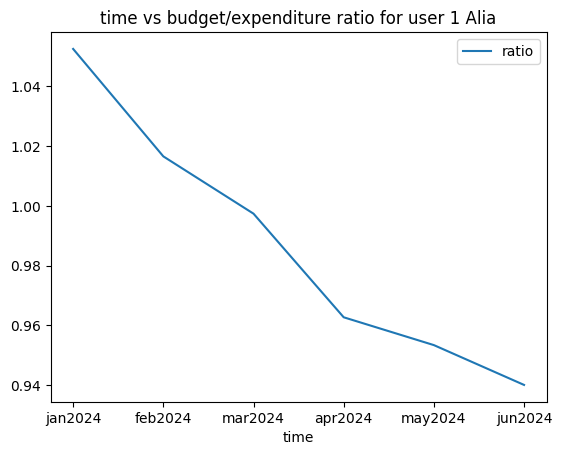

In [ ]:
create_viz_1(1, "Alia")

<ipython-input-17-ad12fee23e44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['time'] = df_graph['month'] + df_graph['year'].astype(str)
<ipython-input-17-ad12fee23e44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['time'] = df_graph['month'] + df_graph['year'].astype(str)
<ipython-input-17-ad12fee23e44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

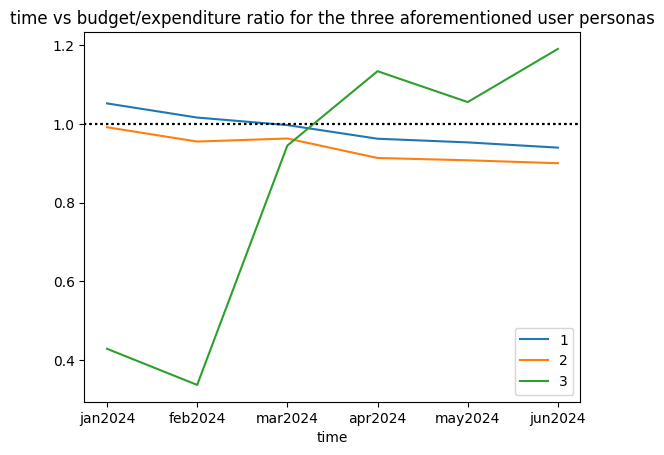

In [ ]:
create_viz_1_for_3_users()

In [ ]:
def create_viz_2(user_id, user_name, p):
  D = p.final_count_prompt
  plt.bar(range(len(D)), list(D.values()), align='center')
  plt.xticks(range(len(D)), ["consensus", "authority", "commitment"]) #consensus, authority, commitment
  plt.title(f"effectiveness of various prompt types for user {user_id} {user_name}")

  plt.show()

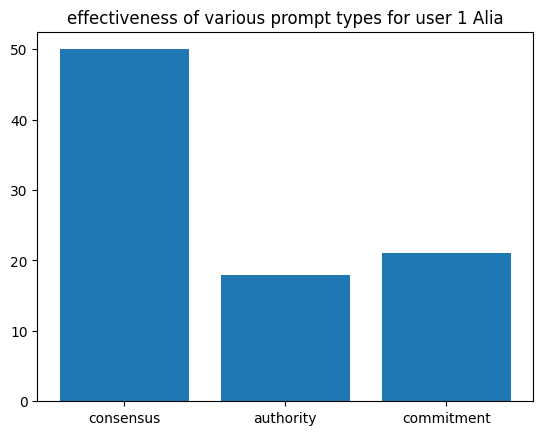

In [ ]:
create_viz_2(1, "Alia", p)

In [ ]:
create_viz_2(1, "Alia", p)

NameError: name 'create_viz_2' is not defined